<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Brief - Les modèles dans tous leurs états </h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">California Housing</h2>
</div>

La problématique étudiée est le cas avec le dataset California Housing. <br>
L'objectif de ce cas est d'estimer le prix d'un bien à partir des paramètres d'entrée donnés dans le dataset. </h3>

Il s'agit donc d'un cas de machine learning supervisé, et plus spécifiquement d'un cas de regression.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1 - Import des librairies et du dataset</h3>
</div>

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [8]:
# display dataset infos
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
# transform dataset to pandas dataframe 
df = pd.DataFrame(housing.data)
df.columns = housing.feature_names
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [10]:
housing.target_names

['MedHouseVal']

In [11]:
df["MedHouseVal"] = housing.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

Visualison maintenant les données en fonction du label 

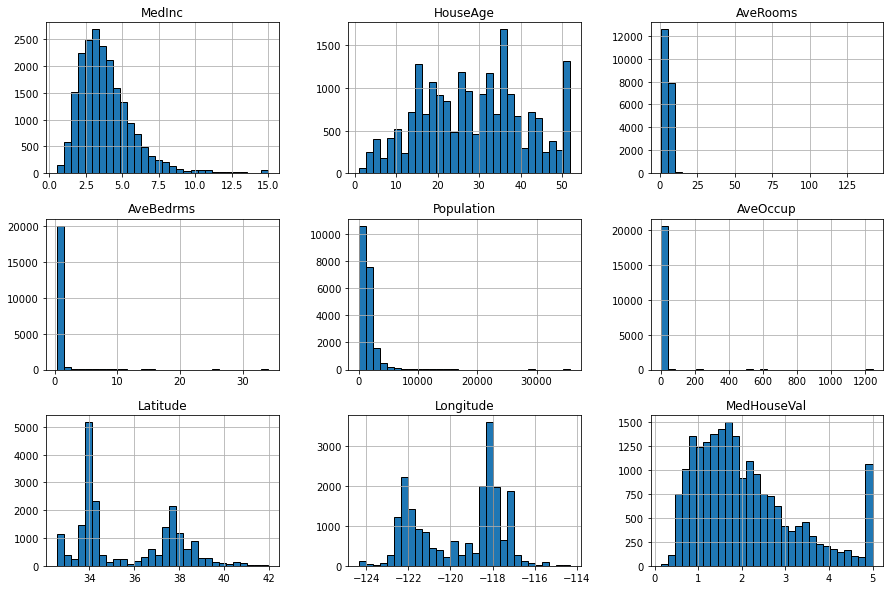

In [14]:
df.hist(figsize=(15,10), bins=30, edgecolor="black")
plt.show()

Les coeficients de correlation va nous permettre de determiner quelles données ont un lien fort

In [15]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

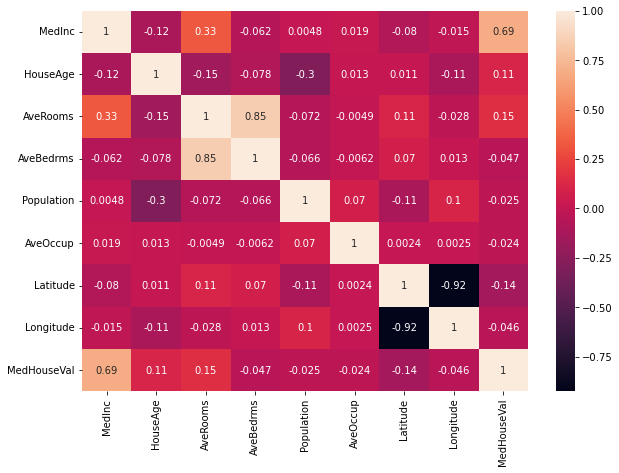

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Nous remarquons qu'en triant nos coefficient la données ayant le plus de lien avec le label est "MedInc"

In [17]:
df.corr()["MedHouseVal"].sort_values()

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

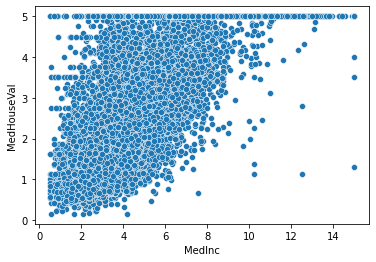

In [18]:
# plot correlation
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"])

<AxesSubplot:xlabel='AveRooms', ylabel='MedHouseVal'>

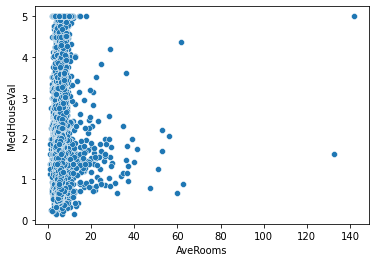

In [19]:
# plot correlation
sns.scatterplot(x=df["AveRooms"], y=df["MedHouseVal"])

In [20]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

StandardScaler qui aide nous pour faire la transformation de fonctionnalité où il convertit la fonctionnalité avec moyenne = 0 et écart type = 1

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# LinearRegression

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Phase d'entrainement et de prediction</h3>
</div>

In [86]:
lineregr = LinearRegression()
lineregr.fit(X_train, y_train)
lineregr_pred= lineregr.predict(X_test)

Notre precision est ici de 0.6, essayons une autre méthode pour obtenir un meilleur coefficient de determination

In [87]:
print("R2_score : ", r2_score(y_test, lineregr_pred))

R2_score :  0.606414511241866


# DecisionTree

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Phase d'entrainement et de prediction</h3>
</div>

In [88]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred= dtree.predict(X_test)

Notre precision est ici de 0.13. Cette methode n'est pas adapté à notre besoin. Nous allons donc garder la methode de la regression lineaire 

In [92]:
print("R2_score : ", r2_score(y_test, dtree_pred))

R2_score :  0.1368792973959284


# RandomForest

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Phase d'entrainement et de prediction</h3>
</div>

In [71]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
rforest_pred= rforest.predict(X_test)

In [72]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [74]:
data = {'MedInc':7.32, 'HouseAge':30.0, 'AveRooms':5.984, 'AveBedrms':1.023, 'Population':280, 'AveOccup':2.20,
       'Latitude':37.88, 'Longitude':-122.2}
index=[0]
newdf = pd.DataFrame(data, index)

In [76]:
newdf

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    7.32      30.0     5.984      1.023         280       2.2     37.88   

   Longitude  
0     -122.2

In [ ]:
Voici une prediction de 

In [77]:
print("la valeur de la median pour la nouvelle dataframe est : ", rforest.predict(newdf))

la valeur de la median pour la nouvelle dataframe est :  [3.8692342]


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
